In [20]:
from env import get_connection
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import acquire
import prepare
import functions as f
import seaborn as sns

from scipy.stats import pearsonr, spearmanr

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

import sklearn.preprocessing 

# Acquire

In [21]:
# Here I used my wrangle function to acquire, prepare, and split my data
df= acquire.get_zillow()

# Prepare
  - Here we will use our prepare function to clean/prep our data
  - This includes:
     - making sure we get rid of our null values
     - rename column names for easier use
     - make dummies 
     - drop columns of no use
  

In [22]:
df.head()

,Unnamed: 0,yearbuilt,taxvaluedollarcnt,taxamount,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,fips
0,0,NaN,27516.0,NaN,0.0,0.0,NaN,6037.0
1,1,NaN,10.0,NaN,0.0,0.0,NaN,6037.0
2,2,NaN,10.0,NaN,0.0,0.0,NaN,6037.0
3,3,NaN,2108.0,174.21,0.0,0.0,NaN,6037.0
4,4,2005.0,296425.0,6941.39,4.0,2.0,3633.0,6037.0


In [23]:
df.isna().sum()

Unnamed: 0                         0
yearbuilt                       9337
taxvaluedollarcnt                493
taxamount                       4442
bedroomcnt                        11
bathroomcnt                       11
calculatedfinishedsquarefeet    8484
fips                               0
dtype: int64

In [24]:
df.drop(columns= ['Unnamed: 0'], inplace= True)

In [25]:
train, val, test= prepare.prep_zillow(df) 

In [26]:
train.isna().sum()

year_built        0
property_value    0
tax_amount        0
bedrooms          0
bathrooms         0
sqr_feet          0
fips              0
dtype: int64

# Explore 

In [27]:
train.head()

,year_built,property_value,tax_amount,bedrooms,bathrooms,sqr_feet,fips
2010611,1965.0,507733.0,5728.14,3.0,2.0,1923.0,6059.0
1937230,2003.0,551948.0,6295.84,4.0,3.0,2420.0,6111.0
170197,1964.0,657428.0,7338.40,5.0,2.0,1982.0,6059.0
407560,1969.0,271635.0,3150.84,4.0,2.0,1738.0,6059.0
980494,1963.0,69288.0,759.52,3.0,2.0,1561.0,6111.0


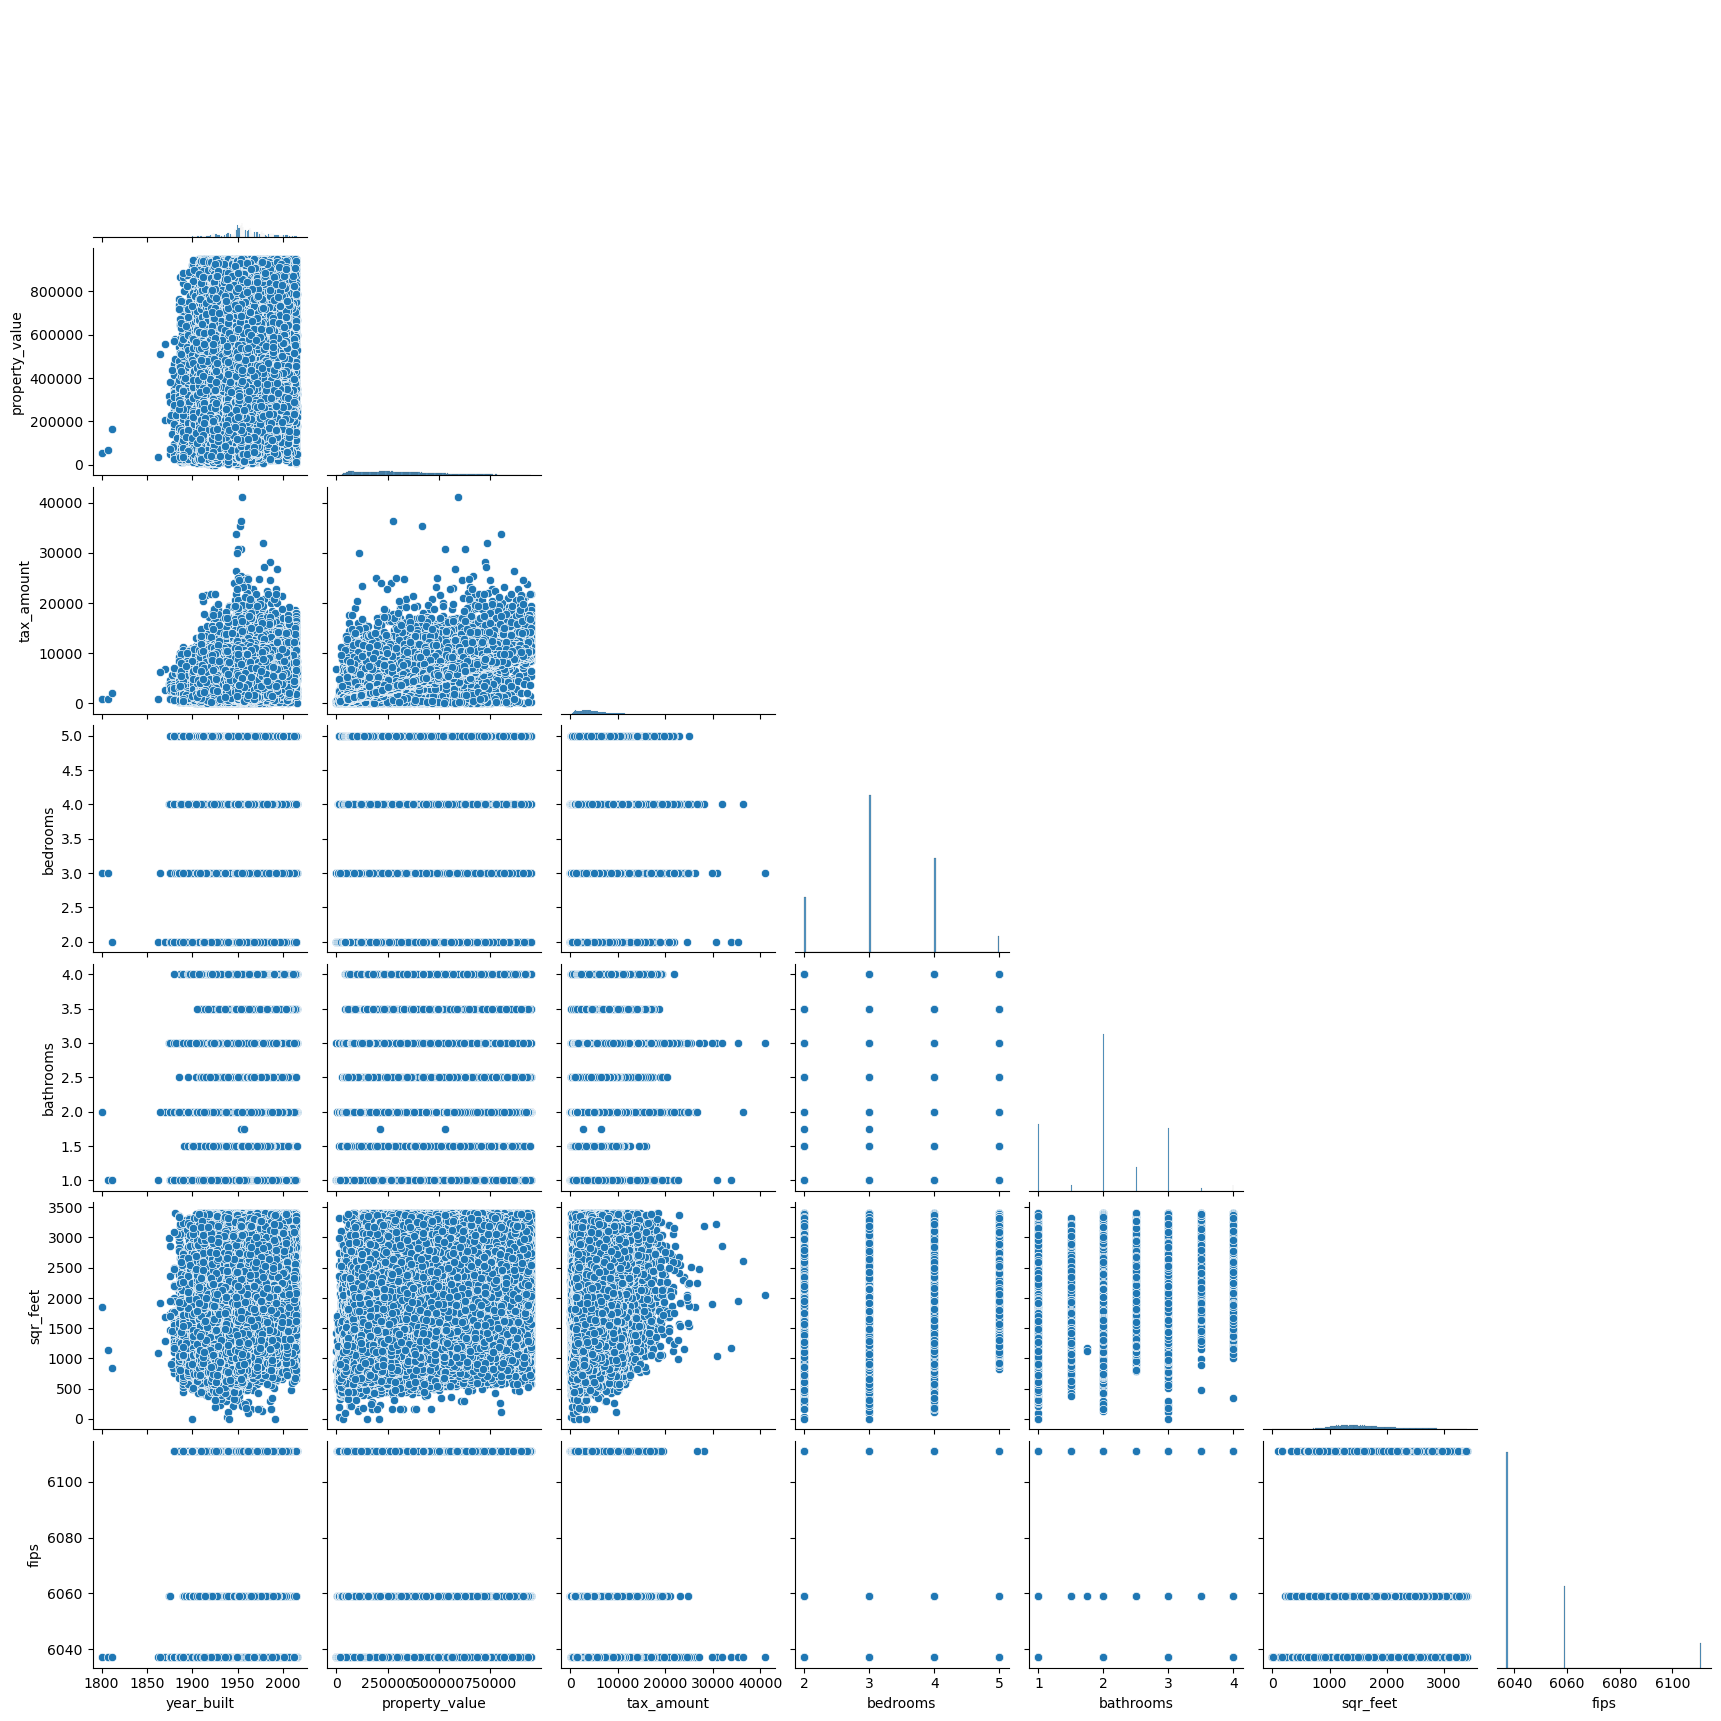

In [28]:
sns.pairplot(train, corner=True)
plt.show()

In [29]:
corr= train.corr()
corr

,year_built,property_value,tax_amount,bedrooms,bathrooms,sqr_feet
year_built,1.000000,0.251903,0.259916,0.367480,0.536096,0.470836
property_value,0.251903,1.000000,0.960275,0.202302,0.363802,0.437176
tax_amount,0.259916,0.960275,1.000000,0.201916,0.362706,0.431883
bedrooms,0.367480,0.202302,0.201916,1.000000,0.581615,0.595352
bathrooms,0.536096,0.363802,0.362706,0.581615,1.000000,0.765456
sqr_feet,0.470836,0.437176,0.431883,0.595352,0.765456,1.000000


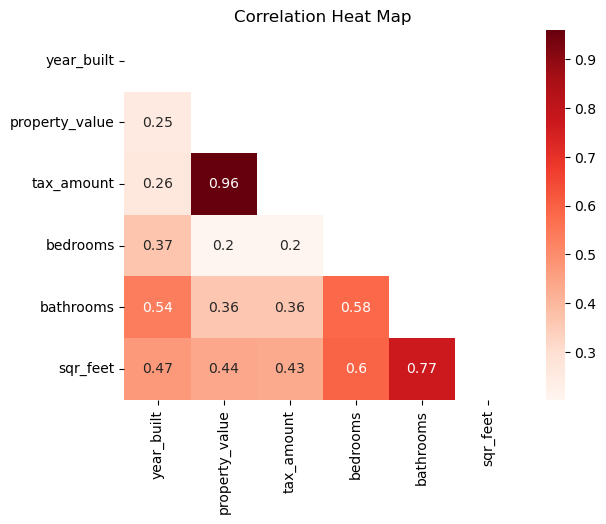

In [31]:
kwargs = {'alpha':.9,'linewidth':3, 'linestyle':'-', 
          'linecolor':'k','rasterized':False, 'edgecolor':'w', 
          'capstyle':'projecting',}

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, cmap='Reds', annot=True, mask= mask)
plt.title('Correlation Heat Map')
plt.show()

# Statistical Testing
  - Here we will be using statistical testing to find any useful information for our modeling phase 

## Is there a correlation between total number of Bedrooms and Property Value

### $H_{o}$: There is no correlation between the total number of bedrooms and property value

### $H_{a}$: There is a relationship between the total number of bedrooms and property value

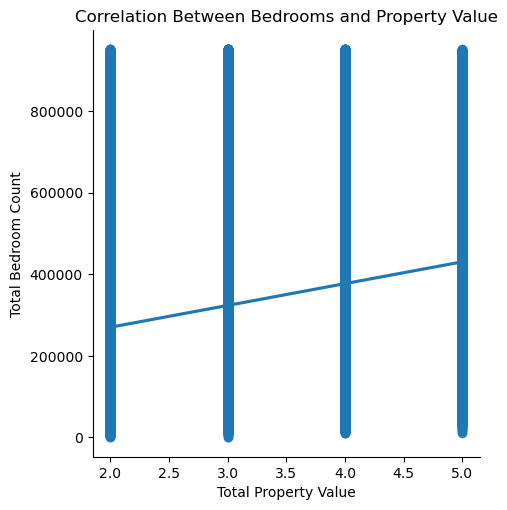

In [32]:
sns.lmplot(x='bedrooms', y='property_value', data= train, scatter=True)
plt.xlabel('Total Property Value')
plt.ylabel('Total Bedroom Count')
plt.title('Correlation Between Bedrooms and Property Value')
plt.show()

In [19]:
r, p_value = pearsonr(train.bedrooms, train.property_value)
print(f'Correlation Coefficient: {r}\nP-value: {p_value}')

Correlation Coefficient: 0.20230172660177168
P-value: 0.0


## Is there a correlation between total Bathroom count and Property Value

### $H_{o}$: There no relationship between total Bathrooms and Property Value

### $H_{a}$: There is a  relationship between total Bathrooms and Property Value

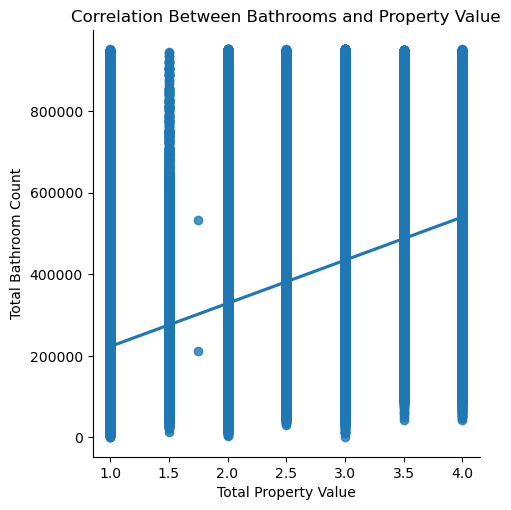

In [33]:
sns.lmplot(x='bathrooms', y='property_value', data= train, scatter=True)
plt.xlabel('Total Property Value')
plt.ylabel('Total Bathroom Count')
plt.title('Correlation Between Bathrooms and Property Value')
plt.show()